# Ford GoBike System Data Exploration
## by Bayan Bin Manea

This document explores a dataset about Lyft bay wheels service which contains 1863721 trip data for the year 2018. 

### Table of Contents   

<ul>
<li><a href="#wrangle">Preliminary Wrangling </a></li>
<li><a href="#univar">Univariate Exploration</a></li>
<li><a href="#bivar">Bivariate Exploration </a></li>
<li><a href="#multivar">Multivariate Exploration</a></li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime


%matplotlib inline

plt.rcParams['figure.figsize'] = (10.0, 8.0)

<a id='wangle'></a>
## Preliminary Wrangling

In [2]:
jan_ford = pd.read_csv('201801-fordgobike-tripdata.csv')
feb_ford = pd.read_csv('201802-fordgobike-tripdata.csv') 
mar_ford = pd.read_csv('201803-fordgobike-tripdata.csv') 
apr_ford = pd.read_csv('201804-fordgobike-tripdata.csv') 
may_ford = pd.read_csv('201805-fordgobike-tripdata.csv') 
jun_ford = pd.read_csv('201806-fordgobike-tripdata.csv')
jul_ford = pd.read_csv('201807-fordgobike-tripdata.csv') 
aug_ford = pd.read_csv('201808-fordgobike-tripdata.csv') 
sep_ford = pd.read_csv('201809-fordgobike-tripdata.csv') 
oct_ford = pd.read_csv('201810-fordgobike-tripdata.csv') 
nov_ford = pd.read_csv('201811-fordgobike-tripdata.csv') 
dec_ford = pd.read_csv('201812-fordgobike-tripdata.csv') 

frames = [jan_ford,feb_ford,mar_ford,apr_ford,may_ford,jun_ford,jul_ford,aug_ford,sep_ford,oct_ford,nov_ford,dec_ford]
df = pd.concat(frames) 
df.shape

(1863721, 14)

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No


### Cleaning 
- Start / end time is not in datetime format 
- bike_id , start_station_id , and end_station_id are not object 
 

In [4]:
df_clean = df.copy()

##### Define  
Convert Start,end time, bike_id ,start_station_id , and end_station_id columns to proper datatype 

##### Code

In [5]:
#to datetime 
df_clean.start_time = pd.to_datetime(df_clean.start_time) 
df_clean.end_time = pd.to_datetime(df_clean.end_time) 

In [6]:
#to object 
df_clean['bike_id'] = df_clean['bike_id'].astype(object)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(object)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(object)

In [7]:
df_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                          object
bike_share_for_all_trip            object
dtype: object

In [8]:
df_clean['month'] = df_clean['start_time'].dt.strftime('%b')
df_clean['day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['hour'] = df_clean['start_time'].dt.strftime('%-H')

#### Test

In [9]:
df_clean.month.value_counts()

Oct    201458
Jul    199222
Jun    195968
Aug    192162
Sep    186217
May    179125
Nov    134135
Dec    131363
Apr    131169
Mar    111382
Feb    106718
Jan     94802
Name: month, dtype: int64

In [10]:
df_clean.day.value_counts()

Tue    319332
Wed    316374
Thu    314124
Mon    294573
Fri    290390
Sat    175614
Sun    153314
Name: day, dtype: int64

In [11]:
df_clean.hour.value_counts()

17    220014
8     206729
18    171335
9     160974
16    143045
19    103930
7     101793
15     96747
12     90140
13     87780
10     84232
14     83207
11     79511
20     66566
21     46956
6      36359
22     31056
23     18645
0      10234
5      10027
1       5884
2       3697
4       2740
3       2120
Name: hour, dtype: int64

In [12]:
df_clean.to_csv(r'ford_bike_master.csv', index = False)

In [13]:
df_clean.info()
df_clean.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1863721 entries, 0 to 131362
Data columns (total 17 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                object        
 13  bike_share_for_all_trip  object        
 14  month                    object        
 15  day                      object        
 16  hour                     object        
dtypes: datetime64[ns](2), float6

0

### What is the structure of your dataset?

> The dataset includes 1863721 trips with 14 features, these features include (trip Duration (seconds), start time and date, end time and date, start station id, start station name, start station latitude, start station longitude, end station id, end station name, end station latitude, end station longitude, bike id, and user type) 

### What is/are the main feature(s) of interest in your dataset?

> I want to understand users usage trends, therefore, seprating users types for analysis is the main feature of interest.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> User type and duration of the trip, and data related to the dates of the trip(start_time,month,day)  

<a id='univar'></a>
## Univariate Exploration

> In this section, I will investigate the distributions of month, day and user types to undersand their trends. 

#### Which month have the highest number of trips? 

Text(0.5,0,'Month')

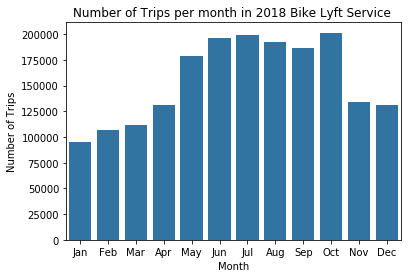

In [14]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_clean, x = 'month', color = base_color)
ax.set_title('Number of Trips per month in 2018 Bike Lyft Service ')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Month')

> **June, July and October appear to have the highest number of trips**

Text(0.5,0,'Weekday')

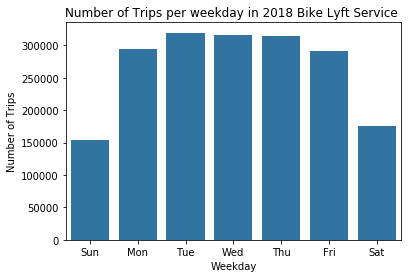

In [15]:
level_order = ['Sun', 'Mon', 'Tue', 'Wed','Thu','Fri','Sat']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
df_clean['day'] = df_clean['day'].astype(ordered_cat)

base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_clean, x = 'day', color = base_color)
ax.set_title('Number of Trips per weekday in 2018 Bike Lyft Service ')
ax.set_ylabel('Number of Trips')
ax.set_xlabel('Weekday')

> **It appears that weekdays have more number of trips than weekends**

#### What is the distribution of users types in Lyft Bike data?

Text(0.5,0,'User Type')

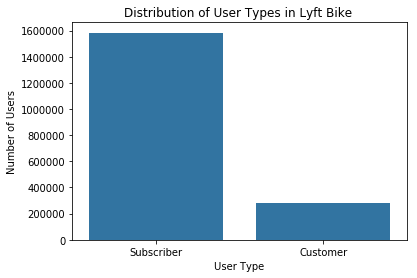

In [16]:
base_color = sb.color_palette()[0]
ax = sb.countplot(data = df_clean, x = 'user_type', color = base_color)
ax.set_title('Distribution of User Types in Lyft Bike ')
ax.set_ylabel('Number of Users')
ax.set_xlabel('User Type')

> **It appears that Subscriber user type is more frequent than Customer in Lyft users.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The weekday ditribution plot needed to be sorted by weekday before plotting.  


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> As mentioned above, the 'day' column needed to be sorted by weekday 

In [17]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,month,day,hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,No,Jan,Wed,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,No,Jan,Wed,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,No,Jan,Wed,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,No,Jan,Wed,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,No,Jan,Wed,19


<a id='bivar'></a>
## Bivariate Exploration

> In this section, I will investigate the relationships between user types in terms of weekly and monthly usage of Bike Lyft Service.

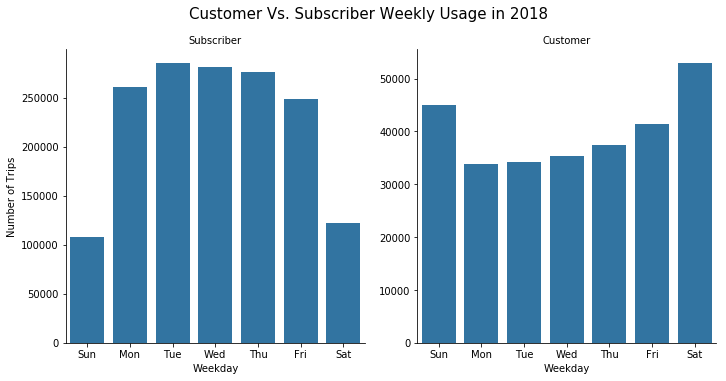

In [18]:
g = sb.catplot(data=df_clean, x='day', col="user_type", kind='count', sharey = False,
            color = base_color)
g.fig.suptitle('Customer Vs. Subscriber Weekly Usage in 2018 ', fontsize=15,y=1.05)
g.set_titles("{col_name}")
g.set_axis_labels(x_var="Weekday", y_var="Number of Trips")

>**Subscribers** appear to use the service more in week days, and they have higher number of trips compared to customers.

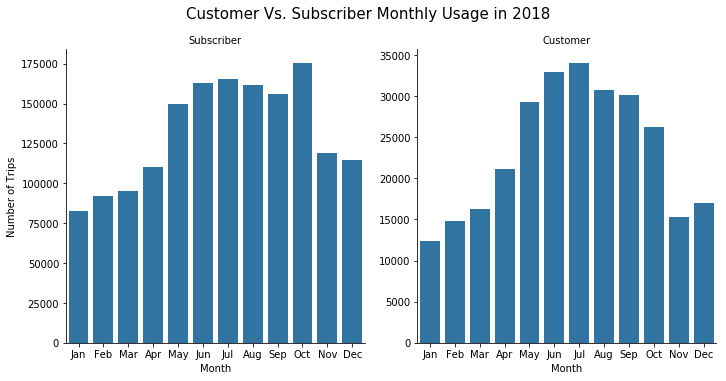

In [19]:
g = sb.catplot(data=df_clean, x='month', col="user_type", kind='count', sharey = False,
            color = base_color)
g.fig.suptitle('Customer Vs. Subscriber Monthly Usage in 2018 ', fontsize=15,y=1.05)
g.set_titles("{col_name}")
g.set_axis_labels(x_var="Month", y_var="Number of Trips")

>June, July, Augest and September appear to have the highest number of trips for both users. 

### Average trip duration by user type

Text(0.5,1,'Average Trip Duration by User Type in 2018')

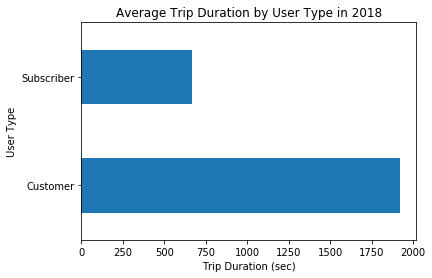

In [20]:
gb = df_clean.groupby(['user_type'])['duration_sec'].mean().plot(kind='barh')
plt.xlabel('Trip Duration (sec)')
plt.ylabel('User Type')
plt.title("Average Trip Duration by User Type in 2018")

>**Customers Take longer trips than Subscribers**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Looking at the data , customers have higher trip duration than subscribers

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I want to further the investigation by looking at the weekday usage for usertypes. 

<a id='multivar'></a>
## Multivariate Exploration

> In this section, I will investigate the trip duration for the day of the week for each user, based on the the average minutes and hours. 



#### How does the average trip duration vary between user the based on the day of the week?

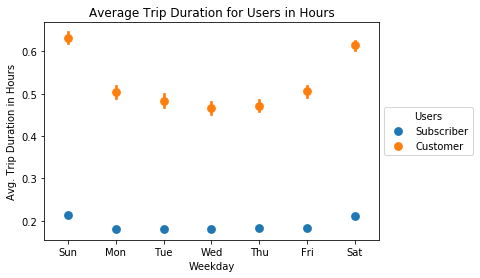

In [21]:
df_clean['duration_hour'] = df_clean['duration_sec'] /3600  
ax = sb.pointplot(x="day", y="duration_hour", hue="user_type",data=df_clean,linestyles="")
plt.xlabel('Weekday');
plt.title('Average Trip Duration for Users in Hours')
plt.ylabel('Avg. Trip Duration in Hours');
ax.legend(title='Users',loc='center left', bbox_to_anchor=(1, 0.5))

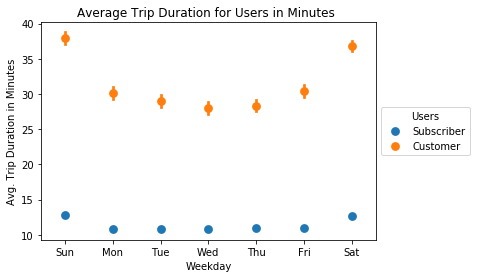

In [22]:
df_clean['duration_min'] = df_clean['duration_sec'] /60  
ax = sb.pointplot(x="day", y="duration_min", hue="user_type",data=df_clean,linestyles="")
plt.xlabel('Weekday');
plt.title('Average Trip Duration for Users in Minutes ')
plt.ylabel('Avg. Trip Duration in Minutes');
ax.legend(title='Users',loc='center left', bbox_to_anchor=(1, 0.5))

**Customers seems to take longer trips compared to Subscribers in terms of average minutes and hours.** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Looking at user types and combaring their average trips duration showed that Customers take longer trips compared to Subscribers, based on the univariate analysis customers use the service in similar pattren on week days ie. Sunday through Thursday. 

### Were there any interesting or surprising interactions between features?

> Customers tend to use Bike Lyft service with higher average trip duration. 


### Resources : 

1. Change title of catplot using {colname} in catplot:  https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
2. How to position suptitle? : https://stackoverflow.com/questions/55767312/how-to-position-suptitle 
3. Catplot: https://seaborn.pydata.org/generated/seaborn.catplot.html 
4. Legend out of the plot : https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
